In [72]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

In [73]:
data = pd.read_csv('./tmdb_movies_cleaned.csv')

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9953 entries, 0 to 9952
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          9953 non-null   int64  
 1   title                       9953 non-null   object 
 2   runtime                     9953 non-null   int64  
 3   release_date                9953 non-null   object 
 4   budget                      9953 non-null   int64  
 5   revenue                     9953 non-null   int64  
 6   popularity                  9953 non-null   float64
 7   vote_average                9953 non-null   float64
 8   vote_count                  9953 non-null   int64  
 9   belongs_to_collection       9953 non-null   int64  
 10  missingness_score           9953 non-null   int64  
 11  has_tagline                 9953 non-null   int64  
 12  has_homepage                9953 non-null   int64  
 13  num_same_title              9953 

In [75]:
def extract_nonbinary_numerical_features(df: pd.DataFrame) -> pd.DataFrame:
    numeric_df = df.select_dtypes(include=[np.number])
    nonbinary_df = numeric_df.loc[:, ~numeric_df.apply(lambda col: set(col.dropna().unique()) <= {0, 1})]

    return nonbinary_df
non_binnary_df = extract_nonbinary_numerical_features(data)


In [76]:
non_binnary_df.info()
non_binnary_df = non_binnary_df.drop(columns=['id', 'release_year', 'popularity_percentile'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9953 entries, 0 to 9952
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          9953 non-null   int64  
 1   runtime                     9953 non-null   int64  
 2   budget                      9953 non-null   int64  
 3   revenue                     9953 non-null   int64  
 4   popularity                  9953 non-null   float64
 5   vote_average                9953 non-null   float64
 6   vote_count                  9953 non-null   int64  
 7   num_same_title              9953 non-null   int64  
 8   num_genres                  9953 non-null   int64  
 9   num_production_companies    9953 non-null   int64  
 10  num_production_countries    9953 non-null   int64  
 11  num_spoken_languages        9953 non-null   int64  
 12  popularity_percentile       9953 non-null   float64
 13  weighted_rating             9953 

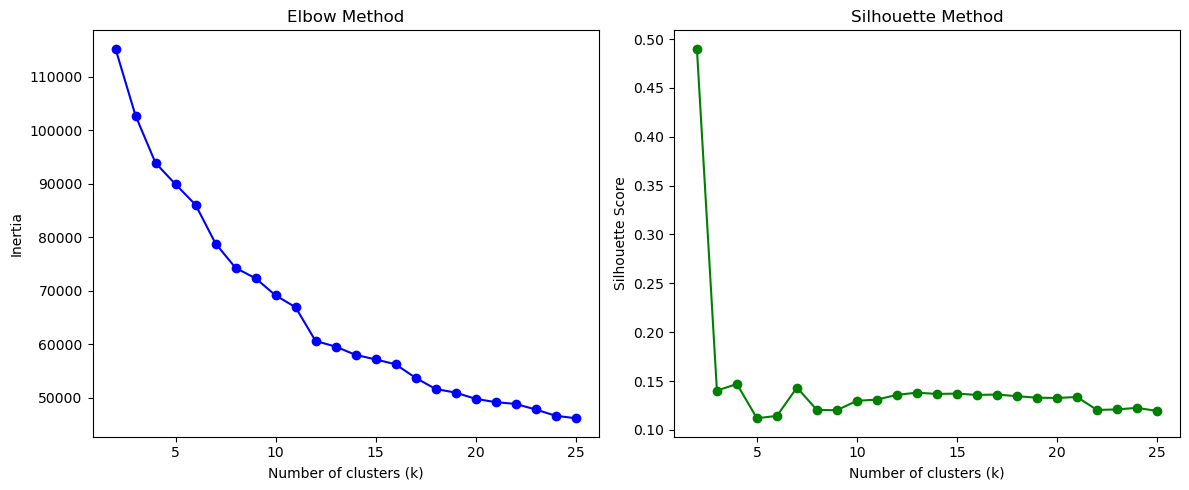

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
k_values = list(range(2, 25 + 1))

scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_binnary_df)


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()



### Using the elbow-method and with a bit corrolation with the sil-score it looks like the ideal cluster-number is around 5

In [78]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_binnary_df)


non_binnary_df["KMeans_Cluster"] = KMeans(n_clusters=5, random_state=42, max_iter=1000).fit_predict(scaled_data)
sample_for_plot = non_binnary_df.sample(3000, random_state=42)

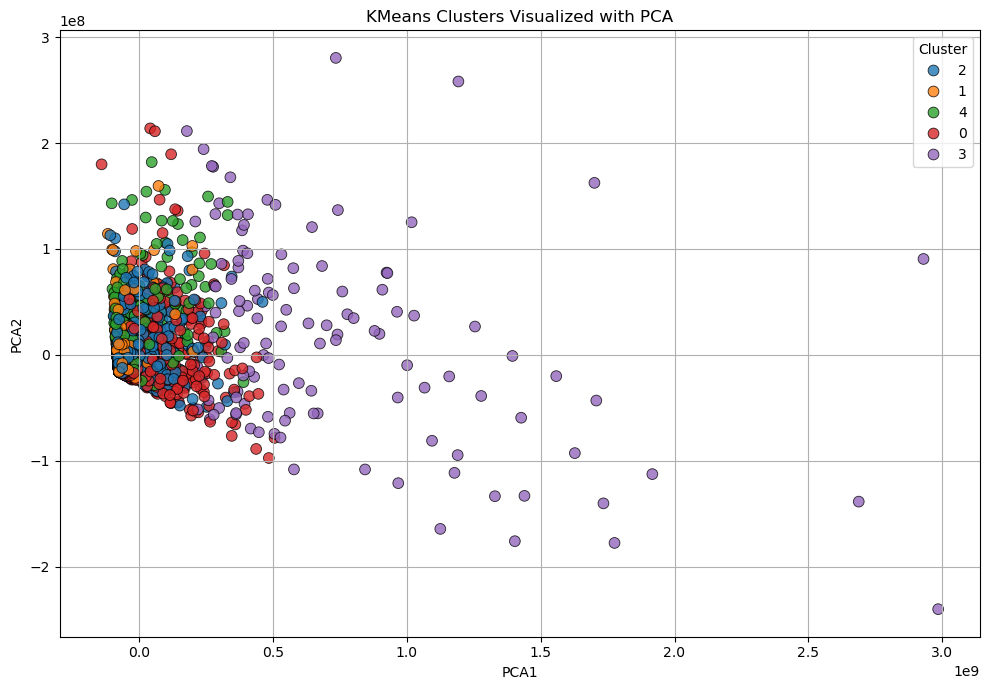

In [79]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(sample_for_plot)

plot_df = pd.DataFrame({
    'PCA1': reduced[:, 0],
    'PCA2': reduced[:, 1],
    'KMeans_Cluster': sample_for_plot['KMeans_Cluster'].astype(str)  # convert to str for color separation
})

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=plot_df,
    x='PCA1', y='PCA2',
    hue='KMeans_Cluster',
    palette='tab10',
    s=60,
    alpha=0.8,
    edgecolor='k'
)
plt.title('KMeans Clusters Visualized with PCA')
plt.legend(title='Cluster')
plt.grid(True)

plt.tight_layout()
plt.show()

# Zoom in

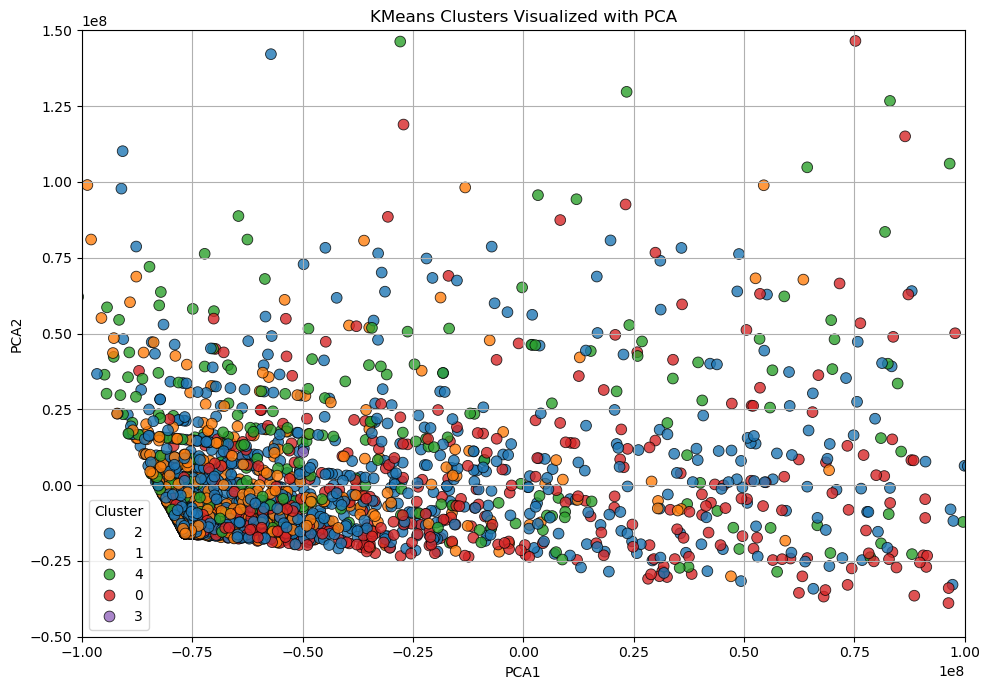

In [80]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(sample_for_plot)

plot_df = pd.DataFrame({
    'PCA1': reduced[:, 0],
    'PCA2': reduced[:, 1],
    'KMeans_Cluster': sample_for_plot['KMeans_Cluster'].astype(str)  # convert to str for color separation
})

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=plot_df,
    x='PCA1', y='PCA2',
    hue='KMeans_Cluster',
    palette='tab10',
    s=60,
    alpha=0.8,
    edgecolor='k'
)
plt.title('KMeans Clusters Visualized with PCA')
plt.legend(title='Cluster')
plt.grid(True)

# Set the limits for the x and y axes to focus on the dense area
plt.xlim([-1e8, 1e8])
plt.ylim([-0.5e8, 1.5e8])

plt.tight_layout()
plt.show()

# 3D

In [83]:
import pandas as pd
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go

sample_for_plot = non_binnary_df.sample(1000, random_state=42)
pca = PCA(n_components=3)
reduced = pca.fit_transform(sample_for_plot)

plot_df = pd.DataFrame(reduced, columns=['PCA1', 'PCA2', 'PCA3'])
plot_df['KMeans_Cluster'] = sample_for_plot['KMeans_Cluster'].astype(str)  # for categorical coloring


fig = px.scatter_3d(
    plot_df,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='KMeans_Cluster', # Color points by cluster
    title='KMeans Clusters Visualized in 3D (PCA)',
    labels={'PCA1': 'PCA Component 1', 'PCA2': 'PCA Component 2', 'PCA3': 'PCA Component 3'}, # Optional: set axis labels
    size_max=8 # Adjust point size
)

fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=40), # Adjust margins
    scene=dict( # Update scene to set axis titles
        xaxis_title='PCA1',
        yaxis_title='PCA2',
        zaxis_title='PCA3'
    )
)
fig.update_layout(scene = dict(
    xaxis = dict(range=[-0.3e9, 0.8e9]),
    yaxis = dict(range=[-0.3e8, 0.6e8]),
    zaxis = dict(range=[-3000, 5000])
))
fig.show()